Let's load up our data, parse dates, and extract the year from the dates. We will use the year in our plots below to indicate the passage of time.

In [1]:
import pandas as pd

DATA = '/kaggle/input/honda-motors-stocks-data-1980-2024/Honda_Data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume,year
0,1980-03-17,0.547989,0.893750,0.909375,0.893750,0.893750,26000,1980
1,1980-03-18,0.557569,0.909375,0.909375,0.909375,0.909375,2000,1980
2,1980-03-19,0.551821,0.900000,0.900000,0.900000,0.900000,2000,1980
3,1980-03-20,0.551821,0.900000,0.900000,0.900000,0.900000,0,1980
4,1980-03-21,0.551821,0.900000,0.900000,0.900000,0.900000,2000,1980


Let's start by looking at our price and volume correlations.

In [2]:
df[['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj_Close,Close,High,Low,Open,Volume
Adj_Close,1.000000,0.983316,0.983123,0.983465,0.983246,0.209911
Close,0.983316,1.000000,0.999913,0.999928,0.999852,0.163777
High,0.983123,0.999913,1.000000,0.999867,0.999918,0.165483
Low,0.983465,0.999928,0.999867,1.000000,0.999906,0.161951
Open,0.983246,0.999852,0.999918,0.999906,1.000000,0.164035
Volume,0.209911,0.163777,0.165483,0.161951,0.164035,1.000000


What do we see?
* None of our prices are perfectly correlated, meaning that we have no duplicate data.
* Prices and volume are positively correlated, which is kind of a surprise, as typically when we have long price and volume time series the price and volume are slightly negatively correlated.

Let's look at the price time series.

<Axes: xlabel='Date', ylabel='Adj_Close'>

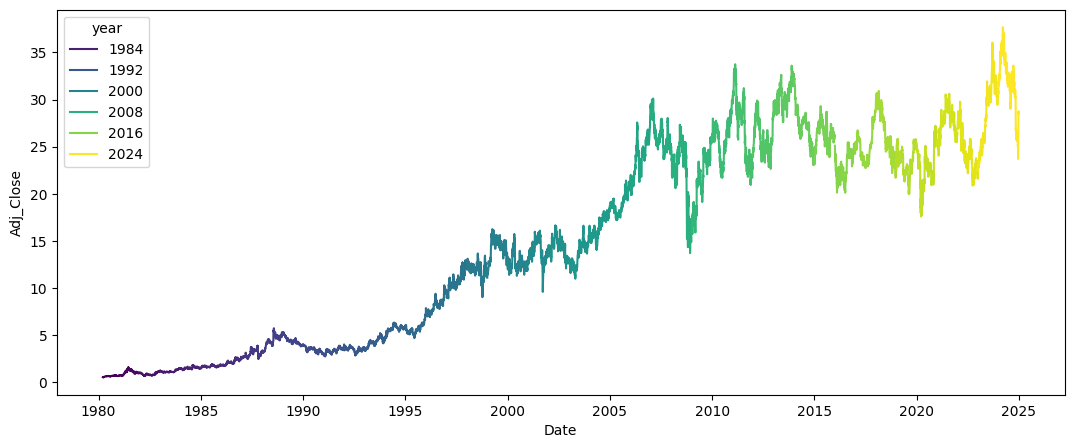

In [3]:
import matplotlib.pyplot as plt
from seaborn import lineplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)

FIGSIZE = (13, 5)
plt.figure(figsize=FIGSIZE)
lineplot(palette='viridis', data=df, x='Date', y='Adj_Close', hue='year')

What do we see? We see a substantial price run-up from the mid-Nineties through the early 2000s, but otherwise the stock seems to trade in a range most of the time. Let's look at the log of the price.

<Axes: xlabel='Date', ylabel='Adj_Close'>

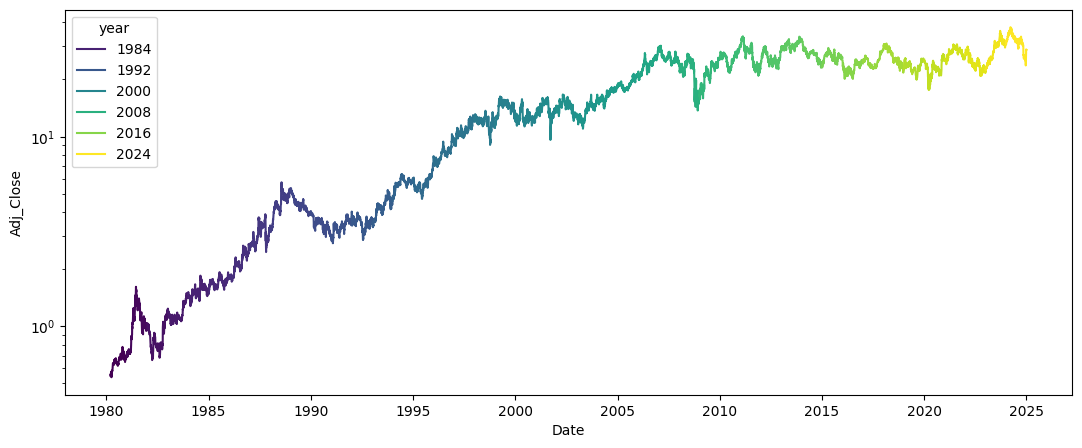

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
lineplot(palette='viridis', data=df, x='Date', y='Adj_Close', hue='year')

This is a surprisingly smooth graph for a large stock. Let's turn our attention to the volume time series. It made sense to use a line plot for the price time series, because daily prices tend to be serially correlated, but when we turn our attention to volumes it makes more sense to use a scatter plot.

<Axes: xlabel='Date', ylabel='Volume'>

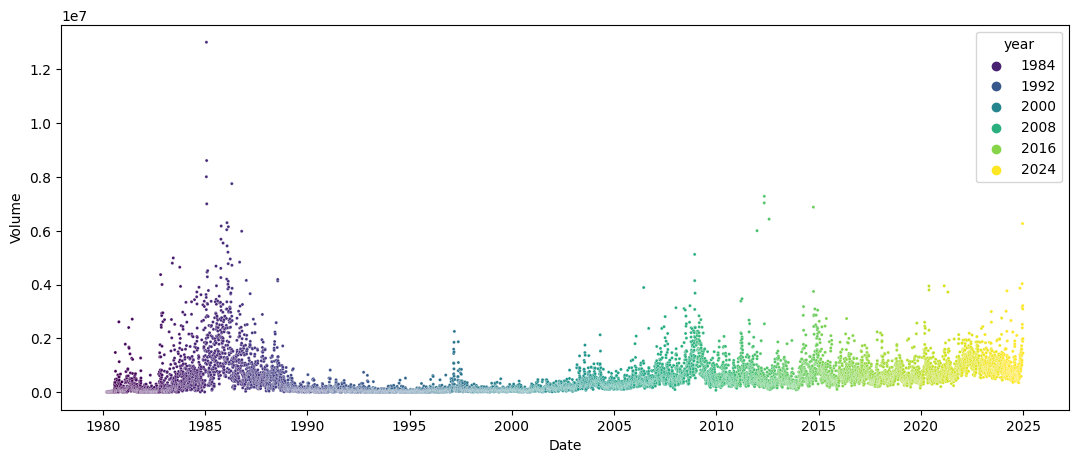

In [5]:
from seaborn import scatterplot

plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year')

The volume plot looks pretty stable, with some outliers. Let's look at the log of the volume to minimize the impact of those outliers.

<Axes: xlabel='Date', ylabel='Volume'>

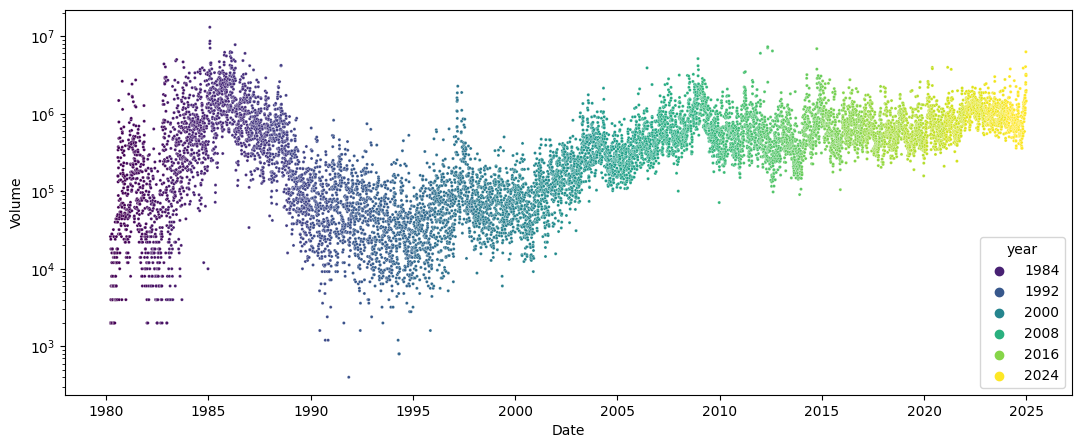

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Volume', hue='year')

The log of the volume, over time, looks surprisingly stable. Let's plot the price and volume against each other.

<Axes: xlabel='Adj_Close', ylabel='Volume'>

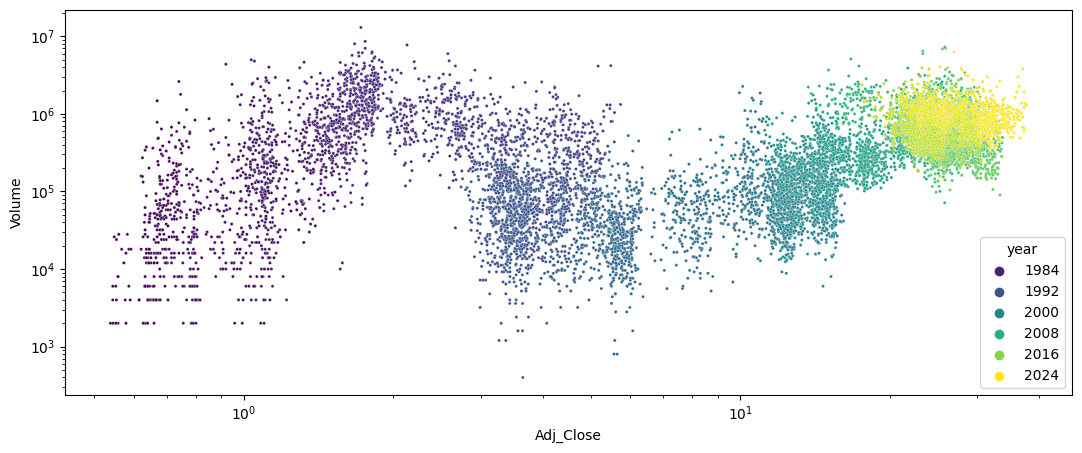

In [7]:
plt.figure(figsize=FIGSIZE)
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Adj_Close', y='Volume', hue='year')

If we plot the log of the volume against the log of the price, we see a lot of stability in recent years, as both price and volume have stayed in a fairly narrow range. Our island of stability shows up in our scatter plot above in the yellow blob toward the upper right corner.